# Investigation of the Iris dataset using Pandas

![Iris flowers](https://editor.analyticsvidhya.com/uploads/51518iris%20img1.png)

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/illinois-cse/data-fa14/gh-pages/data/iris.csv")

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Slicing dataframe data
This is not changing the dataframe. The output is a data series not a new dataframe, the original dataframe remains unchanged.


In [4]:
#select individual column
df['species']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [5]:
#select multiple individual column
df[['species','sepal_length']]

,species,sepal_length
0,setosa,5.1
1,setosa,4.9
2,setosa,4.7
3,setosa,4.6
4,setosa,5.0
...,...,...
145,virginica,6.7
146,virginica,6.3
147,virginica,6.5
148,virginica,6.2


In [6]:
#select section of rows
df[2:6] #first inclusive, last exclusive

,sepal_length,sepal_width,petal_length,petal_width,species
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa


In [7]:
#select multiple individual columns and section of rows
df[['species','sepal_length']][2:6]

,species,sepal_length
2,setosa,4.7
3,setosa,4.6
4,setosa,5.0
5,setosa,5.4


### df.loc an df.iloc slicers

##### **df.loc** is label based (column labels and row labels (therefore first row is 1 not 0)


In [8]:
# inclusive slicer
df.loc[1:4]

,sepal_length,sepal_width,petal_length,petal_width,species
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
# slicer with additional columns selected
df.loc[:,['sepal_length','species']] # :, is for all rows

,sepal_length,species
0,5.1,setosa
1,4.9,setosa
2,4.7,setosa
3,4.6,setosa
4,5.0,setosa
...,...,...
145,6.7,virginica
146,6.3,virginica
147,6.5,virginica
148,6.2,virginica


In [10]:
# range of rows 2-6 with additional columns selected
df.loc[2:6,['sepal_length','species']] #

,sepal_length,species
2,4.7,setosa
3,4.6,setosa
4,5.0,setosa
5,5.4,setosa
6,4.6,setosa


In [11]:
# create new dataframe from selection
newdf=df.loc[2:6,['sepal_length','species']]
newdf

,sepal_length,species
2,4.7,setosa
3,4.6,setosa
4,5.0,setosa
5,5.4,setosa
6,4.6,setosa


##### **df.iloc** uses position based indexing, locations are integers, first row from top is 0, first column from left is 0
<br>
df.iloc[range of rows,range of columns]


In [12]:
df.iloc[100:110,2:5]

,petal_length,petal_width,species
100,6.0,2.5,virginica
101,5.1,1.9,virginica
102,5.9,2.1,virginica
103,5.6,1.8,virginica
104,5.8,2.2,virginica
105,6.6,2.1,virginica
106,4.5,1.7,virginica
107,6.3,1.8,virginica
108,5.8,1.8,virginica
109,6.1,2.5,virginica


#### **df.at** is to return a single value from a data row/column coordinate (label based) - it returns a single value not qa data series

In [13]:
df.at[149,'species']

'virginica'

### Conditional slicing/filtering

In [14]:
#check all rows if they have setosa as species 
df.loc[:,'species']=='setosa'

0       True
1       True
2       True
3       True
4       True
       ...  
145    False
146    False
147    False
148    False
149    False
Name: species, Length: 150, dtype: bool

In [15]:
#df.loc stack - find what is NOT setosa: 

# inside is condition = df['species'] == 'setosa'
# outside is filtered = df.loc[100:123][condition]

# inside: first it selects the all rows ':,' in the 'species' column
# inside: checks if they are setosa and returns true (==) or false (!=)
# outside: filters rows where condition '!=' is true
x=df.loc[df.loc[:,'species'] != 'setosa']
x #this is now a new df


,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [16]:
x.loc[51,:] #get the 51st row with all columns from the new df

sepal_length           6.4
sepal_width            3.2
petal_length           4.5
petal_width            1.5
species         versicolor
Name: 51, dtype: object

In [17]:
# range filter
df.loc[df.loc[:,'petal_width'] >1.6]

,sepal_length,sepal_width,petal_length,petal_width,species
70,5.9,3.2,4.8,1.8,versicolor
77,6.7,3.0,5.0,1.7,versicolor
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica
105,7.6,3.0,6.6,2.1,virginica
106,4.9,2.5,4.5,1.7,virginica
107,7.3,2.9,6.3,1.8,virginica


### Summarising dataset with pandas and seaborn

##### Summarising with pandas built-in functions


In [18]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [19]:
df.tail() # handy to check csv health (anomalies are often in the top or in the end

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [20]:
df.describe() #quick summary of the data

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [21]:
df.mean()

C:\Users\norbe\AppData\Local\Temp\ipykernel_28668\3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64

#### Summarising with seaborn

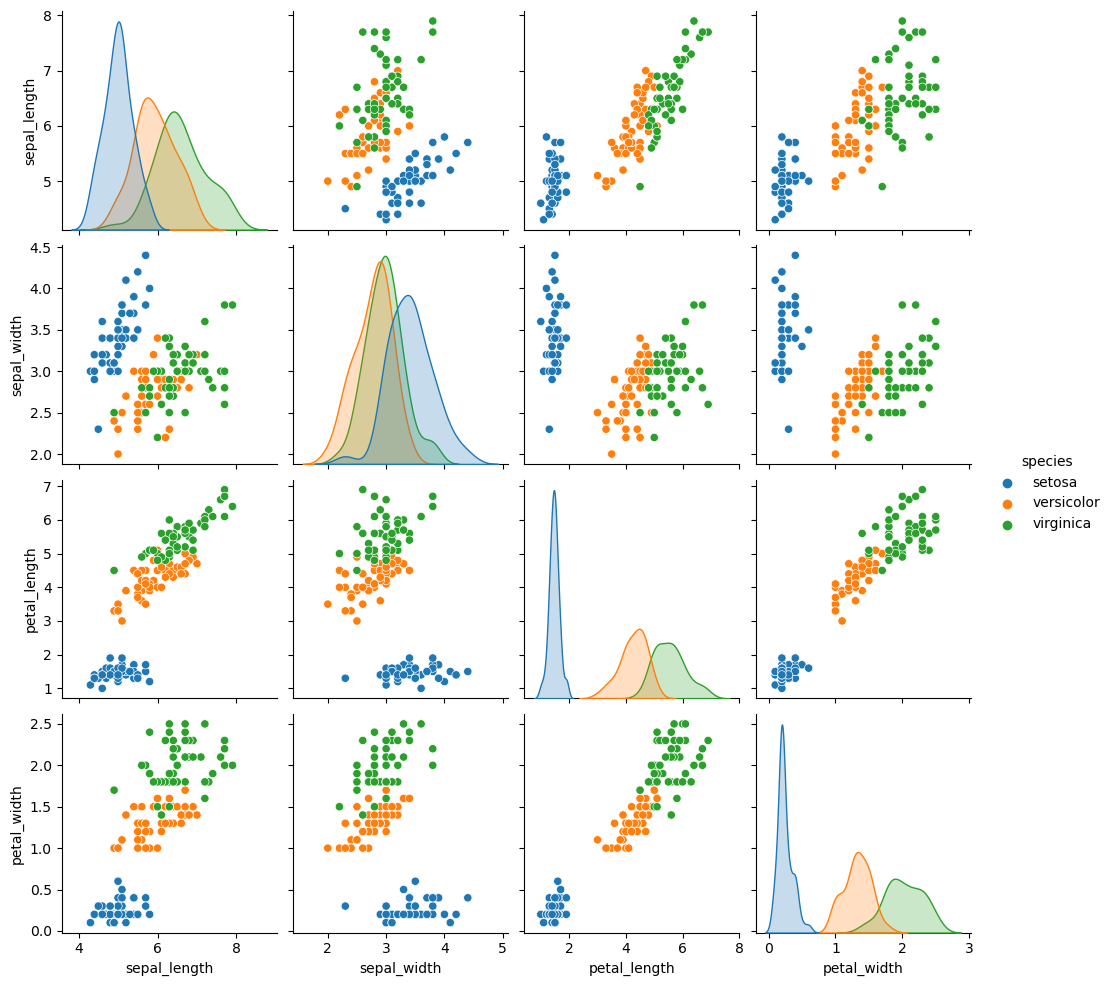

In [22]:
import seaborn as sns

sns.pairplot(df, hue='species')